In [354]:
import pandas as pd
import numpy as np

import datetime as dt

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import STL

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib as mpl

# Data

In [355]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df = df.rename(columns={'date':'ds','value':'y'})
df

,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
...,...,...
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510


In [449]:
def seasonal_dompostition_plots(
    df,
    figsize = (15,15),
    time_series_name=None,
    plot_trend=False,
    solo_plot=False
):


    # Grab the name of the time series
    if time_series_name == None:
        time_series_name = df['y'].name

    # Build a solo plot
    if solo_plot:
        fig, ax = plt.subplots(figsize=figsize)

    # Determine the horizontal label for the time series and ticker 
    if np.issubdtype(df['ds'], np.datetime64):
        time_series_id_label = 'Date'

    elif np.issubdtype(df['ds'], np.number):
        time_series_id_label = 'Series Number'
    else: 
        time_series_id_label = 'Row Number'
  
    # Set marker size
    marker = "o" if len(df['ds']) < 50 else "."
    data = pd.DataFrame(
        lowess(endog=df['y'],exog=np.arange(len(df['y'])),frac=0.15)[:, 1], columns=['y_lowess'])
    df = pd.merge(df,data, left_index=True, right_index=True)
    df['residuals'] = df['y']-df['y_lowess']
    
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharey=False, figsize = figsize)
    
    #Time Series Plot with Trend    
    if plot_trend:
        ax1.plot(
            df['ds'],df['y_lowess'],color='red',linestyle='--',linewidth=2.5, label='Trendline'
        )

    ax1.scatter(
        df['ds'], df['y'], marker=marker, s = 70, color="grey", ec="k", alpha=1, label='Actual Values'
    )
    ax1.plot(
        df['ds'], df['y'], color='steelblue', alpha=1, linewidth=1
    )

    #ax1.set_xlabel(f'\n(x)  {time_series_id_label}', fontsize=12)
    ax1.set_ylabel(f'(y)  {time_series_name}\n', fontsize=12)
    ax1.set_title(f'\nTime Series {time_series_name}\n', fontsize=14)
    ax1.legend(fontsize=14)
    
    #Trend Plot
    ax2.plot(
        df['ds'],df['y_lowess'],color='dodgerblue',linestyle='--',linewidth=2.5, label='Trendline'
    )
    #ax2.set_xlabel(f'\n(x)  {time_series_id_label}', fontsize=12)
    ax2.set_ylabel(f'(y)  {time_series_name}\n', fontsize=12)
    #ax2.set_title(f'\nTrend Line Plot\n', fontsize=12)
    ax2.legend(fontsize=14)

    #DeTrend Plot
    ax3.plot(
        df['ds'], df['residuals'], color='steelblue', alpha=1, linewidth=1, label='Detrended Seasonal Plot'
    )
    #ax3.set_xlabel(f'\n(x)  {time_series_id_label}', fontsize=12)
    ax3.set_ylabel(f'(y)  {time_series_name}\n', fontsize=12)
    #ax3.set_title(f'\nDetrended Data {time_series_name}\n', fontsize=12)
    ax3.legend(fontsize=14)
    ax3.axhline(y=0, color='darkgrey',linestyle='--', linewidth=1)

    #Residuals Plot
    ax4.scatter(
        df['ds'], df['residuals'], marker=marker, s = 70, color="grey", ec="k", alpha=1, label='Residual Values'
    )
    ax4.set_xlabel(f'\n(x)  {time_series_id_label}', fontsize=12)
    ax4.set_ylabel(f'(y)  {time_series_name}\n', fontsize=12)
    #ax4.set_title(f'\nDetrended Data {time_series_name}\n', fontsize=12)
    ax4.legend(fontsize=14)
    ax4.axhline(y=0, color='darkgrey', linestyle='--',linewidth=1)

    if solo_plot is True:
        plt.show()
        plt.close()
        return 



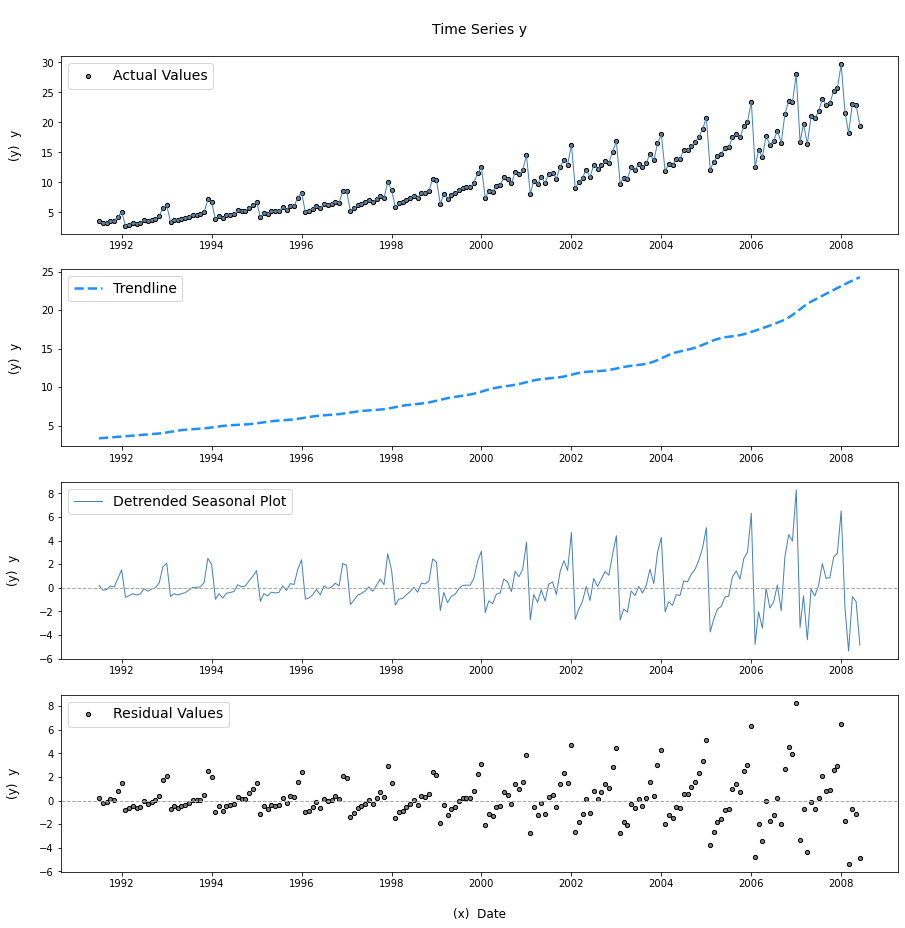

In [446]:
time_series_plot(df)

In [4]:
def weekly_seasonal_boxplots(df, figsize=(7,5), solo_plot=True, ax=None):
    
    """
    Creates side-by-side boxplots showing weekly seasonality.
    """
    
    # Get Vals
    day_name_vals = df['ds'].dt.day_name()
    values = df['y']
    
    # Create DataFrame to Plot
    data = pd.DataFrame({'day_name':day_name_vals, 'values':values})
    data = data.pivot(columns='day_name', values = 'values')
    rename_dict = {
        'Monday':'Mon','Tuesday':'Tue','Wednesday':'Wed','Thursday':'Thu','Friday':'Fri','Saturday':'Sat', 'Sunday':'Sun'
    }
    col_names = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
    data = data.rename(columns=rename_dict)[col_names]
    
    # Build a solo plot
    if solo_plot:
        fig, ax = plt.subplots(figsize=figsize)
        
    ax = data.boxplot(
        figsize=(7,5),
        grid=False,
        return_type='axes'
    )
    ax.set_title('\nWeekly\n', fontsize=15)
    
    return ax

In [5]:
def monthly_seasonal_boxplots(df, figsize=(7,5), solo_plot=True, ax=None):
    
    """
    Creates side-by-side boxplots showing monthly seasonality.
    """

    # Get Vals
    month_name_vals = df['ds'].dt.month_name()
    values = df['y']
        
    # Create DataFrame to Plot
    data = pd.DataFrame({'month_name':month_name_vals, 'values':values})
    data = data.pivot(columns='month_name', values = 'values')

    rename_dict = {
        'January':'Jan','February':'Feb','March':'Mar','April':'Apr','May':'May','June':'Jun',
        'July':'Jul', 'August':'Aug','September':'Sep','October':'Oct','November':'Nov','December':'Dec'
    }
    col_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    data = data.rename(columns=rename_dict)[col_names]

    # Build a solo plot
    if solo_plot:
        fig, ax = plt.subplots(figsize=figsize)

    ax = data.boxplot(
        figsize=(7,5),
        grid=False,
        return_type='axes'
    )
    ax.set_title('\nMonthly\n', fontsize=15)
    
    return ax

In [6]:
def yearly_seasonal_boxplots(df, figsize=(18,5), solo_plot=True, ax=None):
    
    """
    Creates side-by-side boxplots showing yearly seasonality.
    """
    
     # Get Vals   
    year_vals = df['ds'].dt.year
    values = df['y']

    # Create DataFrame to Plot
    data = pd.DataFrame({'year':year_vals, 'values':values})
    data = data.pivot(columns='year', values = 'values')
    data = data[data.columns.sort_values()] # make sure the dates are in order
    

    # Build a solo plot
    if solo_plot:
        fig, ax = plt.subplots(figsize=figsize)
        
    ax = data.boxplot(
        grid=False,
        return_type='axes'
    )
    ax.set_title('\nYearly\n', fontsize=15)
    
    return ax

In [7]:
def seasonal_boxplots(df, figsize=(12,9)):
    
    fig = plt.figure(constrained_layout=True, figsize=figsize) 
    specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig) 

    ax1 = fig.add_subplot(specs[0, 0])
    ax1 = weekly_seasonal_boxplots(df, figsize=(figsize[0]/2,5), solo_plot=False, ax=ax1)
    
    ax2 = fig.add_subplot(specs[0, 1]) 
    ax2 = monthly_seasonal_boxplots(df, figsize=(figsize[0]/2,5), solo_plot=False, ax=ax2)

    ax3 = fig.add_subplot(specs[1, :]) 
    ax3 = yearly_seasonal_boxplots(df, figsize=(figsize[0],5), solo_plot=False, ax=ax3)
    
    plt.show()

In [8]:
def time_series_diagnostic_values(df):

    num_lags= 25 if len(df) >=25 else len(df)

    acf_values, acf_interval, ljung_box_vals, p_vals = acf(
        x=df['y'],
        nlags=num_lags,
        qstat=True,
        alpha=0.05, 
        fft=False
    )

    pacf_values, pacf_interval = pacf(
        x=df['y'],
        nlags=num_lags,
        method='ywadjusted',
        alpha=0.05
    )

    autocorrelations = pd.DataFrame(
        {'Lag':np.arange(num_lags+1),
         'AutoCorr':[val for val in acf_values],
         'ACF Inervals':[val for val in acf_interval],
         'Ljung_Box Q':[val for val in np.insert(ljung_box_vals, 0, None)],
         'p-Value':[val for val in np.insert(p_vals, 0, None)],
         'Partial':[val for val in pacf_values],
         'PACF Intervals':[val for val in pacf_interval]
        }
    )

    return autocorrelations

In [450]:
def time_series_basic_diagnostics(df, figsize = (14,10)):
    
    seasonal_dompostition_plots(df, figsize = (13,13))
      
    # Obtain vals
    n_lags = 25 if len(df.y) >= 25 else len(df.y) 
    lags = np.arange(0,n_lags+1, 1)

    #ACF Vals
    acf_vals, acf_intervals, ljung_box_vals, p_vals = acf(df['y'], nlags=n_lags, qstat=True, alpha=0.05, fft=False)
    acf_lower = acf_intervals[:,0]-acf_vals
    acf_upper = acf_intervals[:,1]-acf_vals

    #PACF Vals
    pacf_vals, pacf_intervals = pacf(df.y,nlags=n_lags,alpha=0.05)
    pacf_lower = pacf_intervals[:,0]-pacf_vals
    pacf_upper = pacf_intervals[:,1]-pacf_vals

    #Ljung-Box Q and P-vals
    ljung_box_vals = np.insert(ljung_box_vals, 0, np.nan, axis=0)
    p_vals = np.insert(p_vals, 0, np.nan, axis=0)

    # Create side by side figures
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize = figsize, 
                                   gridspec_kw={'width_ratios': [1.5, 3, 2.5, 1.5, 3]})
    fig.subplots_adjust(wspace=0) # remove vertical space between axes

    # Build Text For ACF Plot
    for lag_val, acf_val in zip(lags, acf_vals):
        acf_text = str(acf_val.item())[0:6]
        lag_text = str(lag_val.item())[0:2]
        lag_text = ' {}'.format(lag_text) if len(lag_text) == 1 else lag_text
        acf_text = '1.0000' if acf_text == '1.0' else acf_text

        ax1.text(0.1, lag_val+0.2, lag_text, fontsize=11)
        ax1.text(0.4, lag_val+0.2, acf_text, fontsize=11)

    ax1.text(0.1, -1.0, 'Lag')
    ax1.text(0.4, -1.0, "AutoCorr")
    ax1.tick_params(labelbottom=False,labeltop=False)
    ax1.set_yticks([])
    ax1.set_xticks([])
    ax1.set_axis_off()

    # Build ACF Plot
    ax2.barh(lags, acf_vals, align='center', color='darkgrey',edgecolor='black')
    ax2.plot(acf_lower, lags, color='dodgerblue')
    ax2.plot(acf_upper, lags, color='dodgerblue')
    ax2.set_title('\nAuto Correlation (ACF)\n')

    ax2.set_xlim(-1.1,1.1)
    ax2.set_ylim(-0.5, n_lags+0.5)

    ax2.tick_params(labelbottom=True,labeltop=True)
    ax2.set_yticks([])
    ax2.invert_yaxis()

    # Build Text For Ljung-Box Q
    for lag_val, q_val, p_val in zip(lags, ljung_box_vals, p_vals):

        if p_val < 0.001:
            p_text = '<.0001*'
            p_color = 'darkorange'
        elif p_val < 0.05:
            p_text = '<.0500*'
            p_color = 'maroon'
        else:
            p_text = str(p_val.item())[0:6]
            p_color = 'black'

        q_text = str(q_val.item())[0:7]
        q_text = '.' if q_text == 'nan' else q_text
        p_text = '.' if p_text == 'nan' else p_text

        ax3.text(0.20, lag_val+0.2, q_text, fontsize=11)
        ax3.text(0.65, lag_val+0.2, p_text, fontsize=11, color=p_color)

    ax3.text(0.15, -1.0, 'Ljung-Box Q')
    ax3.text(0.65, -1.0, "p-Value")
    ax3.tick_params(labelbottom=False,labeltop=False)
    ax3.set_yticks([])
    ax3.set_xticks([])
    ax3.set_axis_off()

    # Build Text For PACF Plot
    for lag_val, pacf_val in zip(lags, pacf_vals):
        pacf_text = str(pacf_val.item())[0:6]
        lag_text = str(lag_val.item())[0:2]
        lag_text = ' {}'.format(lag_text) if len(lag_text) == 1 else lag_text
        pacf_text = '1.0000' if pacf_text == '1.0' else pacf_text

        ax4.text(0.1, lag_val+0.2, lag_text, fontsize=11)
        ax4.text(0.4, lag_val+0.2, pacf_text, fontsize=11)

    ax4.text(0.1, -1.0, 'Lag')
    ax4.text(0.4, -1.0, "Partial")
    ax4.tick_params(labelbottom=False,labeltop=False)
    ax4.set_yticks([])
    ax4.set_xticks([])
    ax4.set_axis_off()

    # Build PACF Plot
    ax5.barh(lags, pacf_vals, align='center', color='darkgrey',edgecolor='black')
    ax5.plot(pacf_lower, lags, color='dodgerblue')
    ax5.plot(pacf_upper, lags, color='dodgerblue')
    ax5.set_title('\nPartial Auto Correlation (PACF)\n')

    ax5.set_xlim(-1.1,1.1)
    ax5.set_ylim(-0.5, n_lags+0.5)

    ax5.tick_params(labelbottom=True,labeltop=True)
    ax5.set_yticks([])
    ax5.invert_yaxis()

    plt.show()
    plt.close()




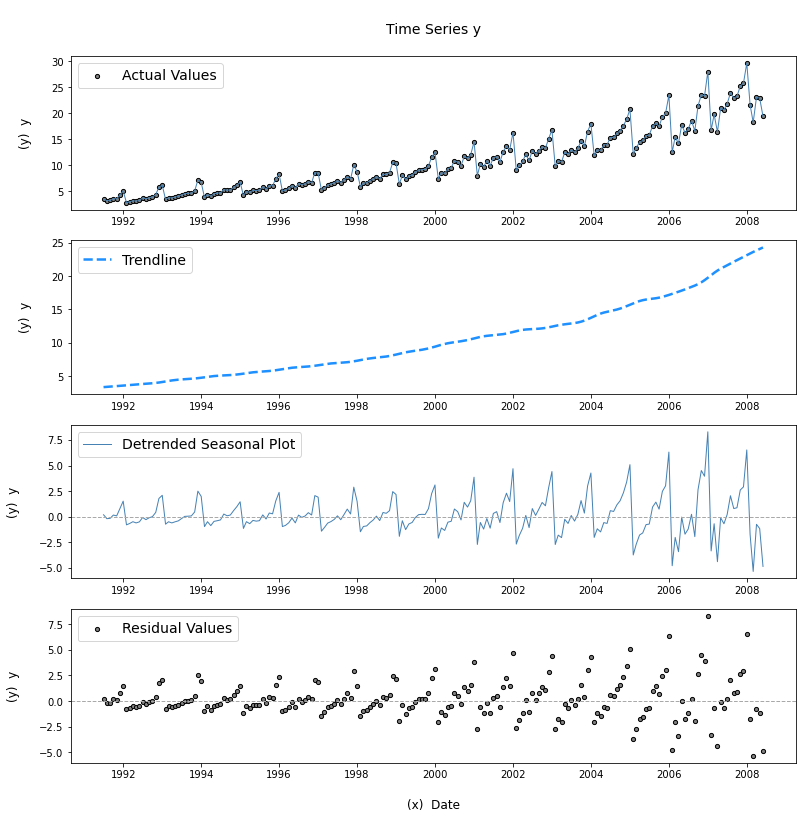

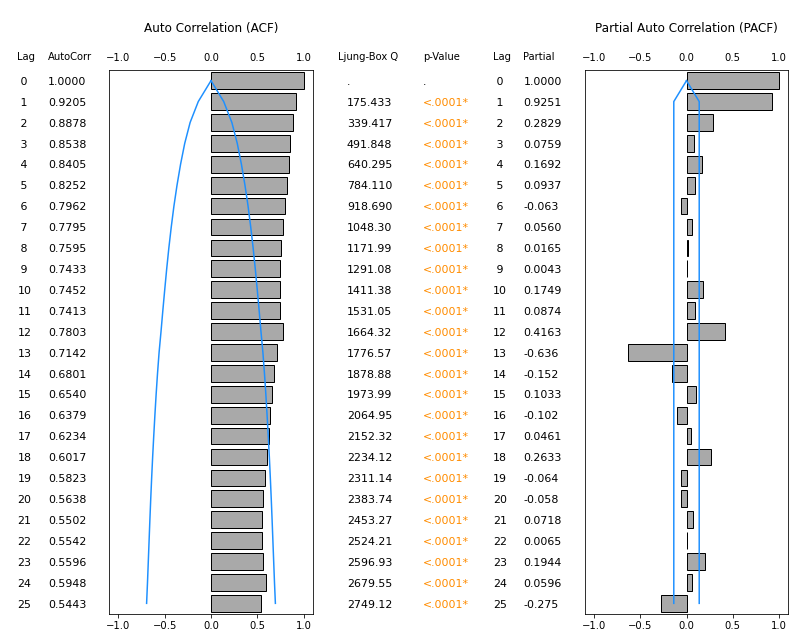

In [451]:
time_series_basic_diagnostics(df)

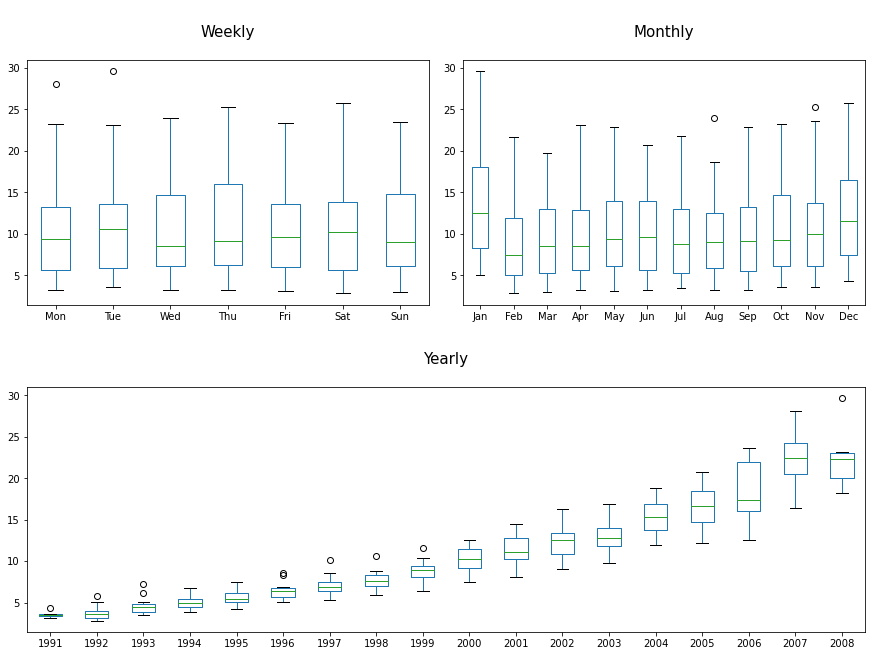

In [10]:
seasonal_boxplots(df, figsize=(12,9))

In [11]:
diagnostic_vals = time_series_diagnostic_values(df)
diagnostic_vals

,Lag,AutoCorr,ACF Inervals,Ljung_Box Q,p-Value,Partial,PACF Intervals
0,0,1.000000,"[1.0, 1.0]",NaN,NaN,1.000000,"[1.0, 1.0]"
1,1,0.920568,"[0.783343220940938, 1.0577930742373]",175.433787,4.813705e-40,0.930521,"[0.7932958463779531, 1.067745699674315]"
2,2,0.887825,"[0.662555043754761, 1.1130953392178884]",339.417587,1.978826e-74,0.345884,"[0.20865950020033247, 0.4831093534966944]"
3,3,0.853859,"[0.5702522262049217, 1.1374650205070798]",491.848576,2.787243e-106,0.135883,"[-0.001342048185296263, 0.2731078051110657]"
4,4,0.840528,"[0.5120614722257795, 1.1689953449082848]",640.295836,2.939213e-137,0.172727,"[0.035502064776182174, 0.30995191807254413]"
5,5,0.825238,"[0.45849823527994493, 1.1919771459017707]",784.110251,3.167141e-167,0.155316,"[0.0180914508820669, 0.29254130417842883]"
6,6,0.796297,"[0.3961142864064361, 1.1964788643852304]",918.690676,3.419747e-195,0.091672,"[-0.045553009968255675, 0.22889684332810628]"
7,7,0.779502,"[0.35051847942547487, 1.2084846567868905]",1048.308626,4.383473e-222,0.139140,"[0.0019155142926062796, 0.27636536758896824]"
8,8,0.759533,"[0.3046584739909332, 1.2144065446619228]",1171.998472,1.075302e-247,0.126934,"[-0.010291384773786855, 0.2641584685225751]"
9,9,0.743376,"[0.26521603869487786, 1.2215357273558944]",1291.089683,2.599520e-272,0.110982,"[-0.026242538434514795, 0.24820731486184716]"


In [268]:
acf_vals, acf_intervals, ljung_box_vals, p_vals = acf(df['y'], nlags=n_lags, qstat=True, alpha=0.05, fft=False)

In [271]:
len(acf_intervals)

26

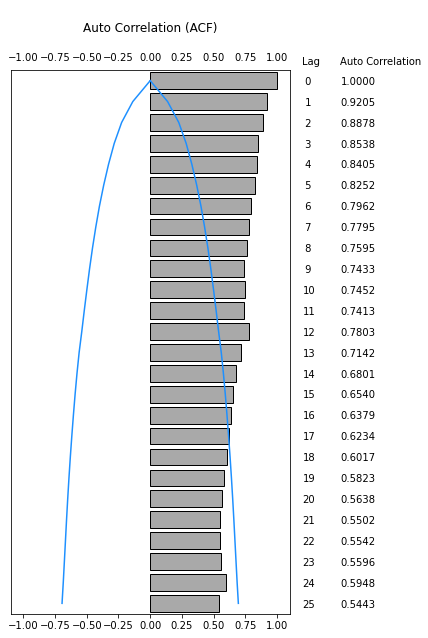

In [214]:
# Defaults
figsize = (5,10)
solo_plot = True

# Obtain vals
n_lags = 25 if len(df.y) >= 25 else len(df.y) 
acf_vals, acf_intervals, ljung_box_vals, p_vals = acf(df['y'], nlags=n_lags, qstat=True, alpha=0.05, fft=False)

acf_lower = acf_intervals[:,0]-acf_vals
acf_upper = acf_intervals[:,1]-acf_vals
lags = np.arange(0,n_lags+1, 1)

# Build a solo plot
if solo_plot:
    fig, ax = plt.subplots(figsize=figsize)

# Build axis
ax.barh(lags, acf_vals, align='center', color='darkgrey',edgecolor='black')

ax.set_xlim(-1.1,1.1)
ax.set_ylim(-0.5, n_lags+0.5)
ax.plot(acf_lower, lags, color='dodgerblue')
ax.plot(acf_upper, lags, color='dodgerblue')
ax.set_yticks(lags)
ax.set_title('\nAuto Correlation (ACF)\n')
ax.tick_params(labelbottom=False,labeltop=True)

for lag_val, acf_val in zip(lags, acf_vals):
    acf_text = str(acf_val.item())[0:6]
    lag_text = str(lag_val.item())[0:2]
    lag_text = ' {}'.format(lag_text) if len(lag_text) == 1 else lag_text
    acf_text = '1.0000' if acf_text == '1.0' else acf_text
    ax.text(1.2, lag_val+0.2, lag_text)
    ax.text(1.5, lag_val+0.2, acf_text)

ax.text(1.2, -0.75, 'Lag')
ax.text(1.5, -0.75, "Auto Correlation")

ax.set_yticks([])
ax.tick_params(labelbottom=True,labeltop=True)
plt.gca().invert_yaxis()

In [ ]:
for lag_val, acf_val in zip(lags, acf_vals):
    acf_text = str(acf_val.item())[0:6]
    lag_text = str(lag_val.item())[0:2]
    lag_text = ' {}'.format(lag_text) if len(lag_text) == 1 else lag_text
    acf_text = '1.0000' if acf_text == '1.0' else acf_text
    ax.text(1.2, lag_val+0.2, lag_text)
    ax.text(1.5, lag_val+0.2, acf_text)

ax.text(1.2, -0.75, 'Lag')
ax.text(1.5, -0.75, "Auto Correlation")

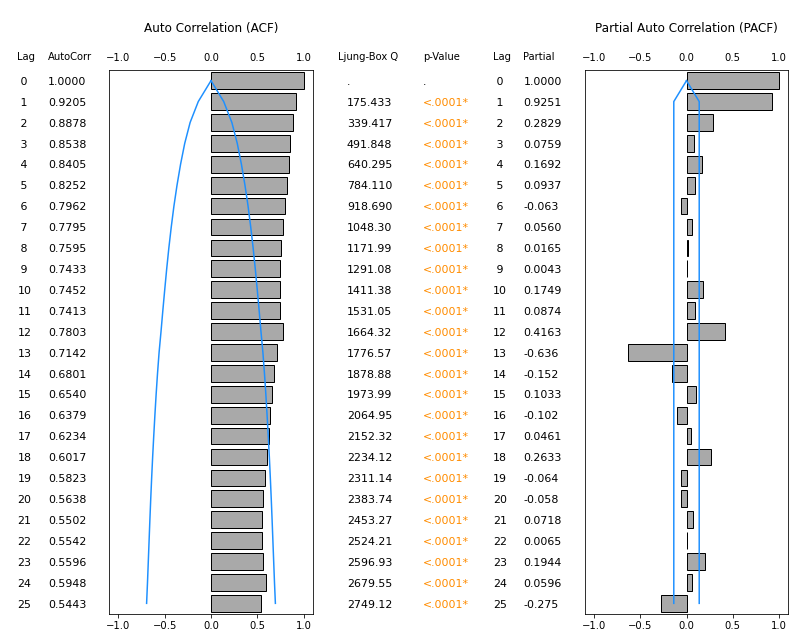

In [404]:
# Defaults
figsize = (14,10)
solo_plot = True

# Obtain vals
n_lags = 25 if len(df.y) >= 25 else len(df.y) 
lags = np.arange(0,n_lags+1, 1)

#ACF Vals
acf_vals, acf_intervals, ljung_box_vals, p_vals = acf(df['y'], nlags=n_lags, qstat=True, alpha=0.05, fft=False)
acf_lower = acf_intervals[:,0]-acf_vals
acf_upper = acf_intervals[:,1]-acf_vals

#PACF Vals
pacf_vals, pacf_intervals = pacf(df.y,nlags=n_lags,alpha=0.05)
pacf_lower = pacf_intervals[:,0]-pacf_vals
pacf_upper = pacf_intervals[:,1]-pacf_vals

#Ljung-Box Q and P-vals
ljung_box_vals = np.insert(ljung_box_vals, 0, np.nan, axis=0)
p_vals = np.insert(p_vals, 0, np.nan, axis=0)

# Create side by side figures
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize = figsize, 
                               gridspec_kw={'width_ratios': [1.5, 3, 2.5, 1.5, 3]})
fig.subplots_adjust(wspace=0) # remove vertical space between axes

# Build Text For ACF Plot
for lag_val, acf_val in zip(lags, acf_vals):
    acf_text = str(acf_val.item())[0:6]
    lag_text = str(lag_val.item())[0:2]
    lag_text = ' {}'.format(lag_text) if len(lag_text) == 1 else lag_text
    acf_text = '1.0000' if acf_text == '1.0' else acf_text
    
    ax1.text(0.1, lag_val+0.2, lag_text, fontsize=11)
    ax1.text(0.4, lag_val+0.2, acf_text, fontsize=11)

ax1.text(0.1, -1.0, 'Lag')
ax1.text(0.4, -1.0, "AutoCorr")
ax1.tick_params(labelbottom=False,labeltop=False)
ax1.set_yticks([])
ax1.set_xticks([])
ax1.set_axis_off()

# Build ACF Plot
ax2.barh(lags, acf_vals, align='center', color='darkgrey',edgecolor='black')
ax2.plot(acf_lower, lags, color='dodgerblue')
ax2.plot(acf_upper, lags, color='dodgerblue')
ax2.set_title('\nAuto Correlation (ACF)\n')

ax2.set_xlim(-1.1,1.1)
ax2.set_ylim(-0.5, n_lags+0.5)

ax2.tick_params(labelbottom=True,labeltop=True)
ax2.set_yticks([])
ax2.invert_yaxis()

# Build Text For Ljung-Box Q
for lag_val, q_val, p_val in zip(lags, ljung_box_vals, p_vals):
    
    if p_val < 0.001:
        p_text = '<.0001*'
        p_color = 'darkorange'
    elif p_val < 0.05:
        p_text = '<.0500*'
        p_color = 'maroon'
    else:
        p_text = str(p_val.item())[0:6]
        p_color = 'black'
        
    q_text = str(q_val.item())[0:7]
    q_text = '.' if q_text == 'nan' else q_text
    p_text = '.' if p_text == 'nan' else p_text

    ax3.text(0.20, lag_val+0.2, q_text, fontsize=11)
    ax3.text(0.65, lag_val+0.2, p_text, fontsize=11, color=p_color)

ax3.text(0.15, -1.0, 'Ljung-Box Q')
ax3.text(0.65, -1.0, "p-Value")
ax3.tick_params(labelbottom=False,labeltop=False)
ax3.set_yticks([])
ax3.set_xticks([])
ax3.set_axis_off()

# Build Text For PACF Plot
for lag_val, pacf_val in zip(lags, pacf_vals):
    pacf_text = str(pacf_val.item())[0:6]
    lag_text = str(lag_val.item())[0:2]
    lag_text = ' {}'.format(lag_text) if len(lag_text) == 1 else lag_text
    pacf_text = '1.0000' if pacf_text == '1.0' else pacf_text
    
    ax4.text(0.1, lag_val+0.2, lag_text, fontsize=11)
    ax4.text(0.4, lag_val+0.2, pacf_text, fontsize=11)

ax4.text(0.1, -1.0, 'Lag')
ax4.text(0.4, -1.0, "Partial")
ax4.tick_params(labelbottom=False,labeltop=False)
ax4.set_yticks([])
ax4.set_xticks([])
ax4.set_axis_off()

# Build PACF Plot
ax5.barh(lags, pacf_vals, align='center', color='darkgrey',edgecolor='black')
ax5.plot(pacf_lower, lags, color='dodgerblue')
ax5.plot(pacf_upper, lags, color='dodgerblue')
ax5.set_title('\nPartial Auto Correlation (PACF)\n')

ax5.set_xlim(-1.1,1.1)
ax5.set_ylim(-0.5, n_lags+0.5)

ax5.tick_params(labelbottom=True,labeltop=True)
ax5.set_yticks([])
ax5.invert_yaxis()

plt.show()
plt.close()




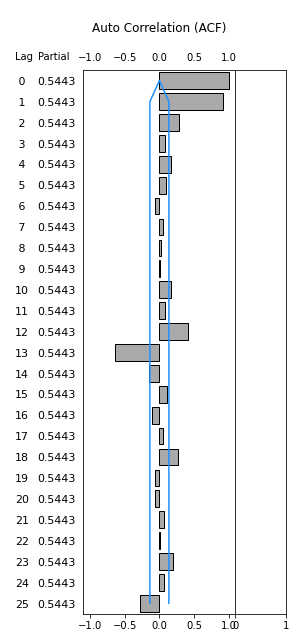

In [318]:
# Defaults
figsize = (5,10)
solo_plot = True

# Obtain PACF vals
n_lags = 25 if len(df.y) >= 25 else len(df.y) 
pacf_vals, pacf_intervals = pacf(df.y,nlags=n_lags,alpha=0.05)
pacf_lower = pacf_intervals[:,0]-pacf_vals
pacf_upper = pacf_intervals[:,1]-pacf_vals
lags = np.arange(0,n_lags+1, 1)


# Create side by side figures
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = figsize, 
                               gridspec_kw={'width_ratios': [1.5, 3, 1]})
fig.subplots_adjust(wspace=0) # remove vertical space between axes

# Build Text For PACF Plot
for lag_val, pacf_val in zip(lags, pacf_vals):
    pacf_text = str(pacf_val.item())[0:6]
    lag_text = str(lag_val.item())[0:2]
    lag_text = ' {}'.format(lag_text) if len(lag_text) == 1 else lag_text
    pacf_text = '1.0000' if pacf_text == '1.0' else pacf_text
    
    ax1.text(0.1, lag_val+0.2, lag_text, fontsize=11)
    ax1.text(0.4, lag_val+0.2, acf_text, fontsize=11)

ax1.text(0.1, -1.0, 'Lag')
ax1.text(0.4, -1.0, "Partial")
ax1.tick_params(labelbottom=False,labeltop=False)
ax1.set_yticks([])
ax1.set_xticks([])
ax1.set_axis_off()

# Build ACF Plot
ax2.barh(lags, pacf_vals, align='center', color='darkgrey',edgecolor='black')
ax2.plot(pacf_lower, lags, color='dodgerblue')
ax2.plot(pacf_upper, lags, color='dodgerblue')
ax2.set_title('\nAuto Correlation (ACF)\n')

ax2.set_xlim(-1.1,1.1)
ax2.set_ylim(-0.5, n_lags+0.5)

ax2.tick_params(labelbottom=True,labeltop=True)
ax2.set_yticks([])
ax2.invert_yaxis()

plt.show()
plt.close()


In [275]:
# Obtain vals
n_lags = 25 if len(df.y) >= 25 else len(df.y) 
lags = np.arange(0,n_lags+1, 1)

#ACF Vals
acf_vals, acf_intervals, ljung_box_vals, p_vals = acf(df['y'], nlags=n_lags, qstat=True, alpha=0.05, fft=False)
acf_lower = acf_intervals[:,0]-acf_vals
acf_upper = acf_intervals[:,1]-acf_vals

#PACF Vals
pacf_vals, pacf_intervals = pacf(df.y,nlags=n_lags,alpha=0.05)
pacf_lower = pacf_intervals[:,0]-acf_vals
pacf_upper = pacf_intervals[:,1]-acf_vals

#Ljung-Box Q and P-vals
ljung_box_vals = np.insert(ljung_box_vals, 0, np.nan, axis=0)
p_vals = np.insert(p_vals, 0, np.nan, axis=0)


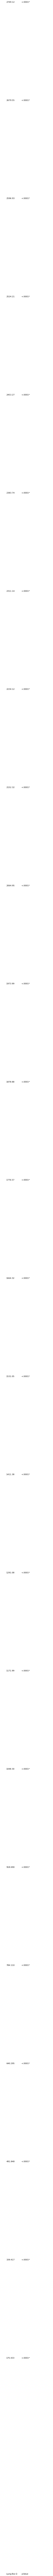

In [296]:
fig, ax3 = plt.subplots(figsize = figsize)
                                    
# Build Text For Ljung-Box Q
for lag_val, q_val, p_val in zip(lags, ljung_box_vals, p_vals):
    
    if p_val < 0.001:
        p_text = '<.0001*'
    elif p_val < 0.05:
        p_text = '<.0500*'
    else:
        p_text = str(p_val.item())[0:6]

    q_text = str(q_val.item())[0:7]
    q_text = '' if q_text == 'nan' else q_text
    p_text = '' if p_text == 'nan' else p_text

    ax3.text(0.1, lag_val+0.2, q_text, fontsize=11)
    ax3.text(0.4, lag_val+0.2, p_text, fontsize=11)

ax3.text(0.1, -1.0, 'Ljung-Box Q')
ax3.text(0.4, -1.0, "p-Value")
ax3.tick_params(labelbottom=False,labeltop=False)
ax3.set_yticks([])
ax3.set_xticks([])
ax3.set_axis_off()

In [282]:
p_vals


array([            nan, 4.81370497e-040, 1.97882572e-074, 2.78724330e-106,
       2.93921282e-137, 3.16714081e-167, 3.41974743e-195, 4.38347343e-222,
       1.07530217e-247, 2.59951951e-272, 3.45031967e-297, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000])

In [91]:
acf_vals

array([1.        , 0.92056815, 0.88782519, 0.85385862, 0.84052841,
       0.82523769, 0.79629658, 0.77950157, 0.75953251, 0.74337588,
       0.74521347, 0.74134847, 0.78031252, 0.71424686, 0.68014097,
       0.65401657, 0.63791893, 0.62349882, 0.60171747, 0.58230335,
       0.5638103 , 0.5502367 , 0.55428812, 0.55963579, 0.5948865 ,
       0.5443742 ])

ValueError: x and y must have same first dimension, but have shapes (15,) and (26,)

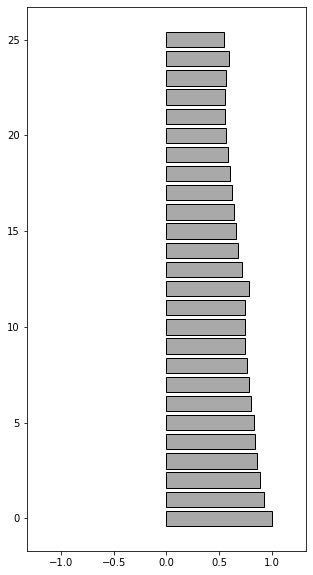

In [24]:
df = diagnostic_vals.sort_values(by='Lag', ascending=False)
figsize = (5,10)
solo_plot = True

# Build a solo plot
if solo_plot:
    fig, ax = plt.subplots(figsize=figsize)

# Extract ACF upper and lower intervals
acf_lower, acf_upper = map(list, zip(*(df['ACF Inervals'])))
acf_vals = df['AutoCorr'].tolist()
ax.barh(df['Lag'], df['AutoCorr'], align='center', color='darkgrey',edgecolor='black')
ax.set_xlim(-max(abs(max(acf_lower)),abs(max(acf_upper))), max(abs(max(acf_lower)),abs(max(acf_upper))))

acf_lower =pacf_interval[1:,0] - pacf_value[1:]
acf_upper =pacf_interval[1:, 1]- pacf_value[1:]

ax.plot(acf_lower, df['Lag'])
ax.plot(acf_upper, df['Lag'])
ax.set_ylim(-0.5,25.5)

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.df['y'].tolist(), lags=50, ax=axes[0])
plot_pacf(df.df['y'].tolist(), lags=50, ax=axes[1])

In [ ]:
max(abs(max(acf_lower)),abs(max(acf_upper)))

In [ ]:
stuff_check = df['ACF Inervals']
test_a,test_b = map(list, zip(*stuff_check))
test_a

In [ ]:
[item[0] for item in df['ACF Inervals'].tolist()]

In [ ]:
a = ("John", "Charles", "Mike")
b = ("Jenny", "Christy", "Monica", "Vicky")

x = zip(a, b)
*x

In [ ]:
a = [1,2,3]
b = [4,5,6]
zipped_list = zip(a,b)

In [ ]:
#x = lambda x: zip(*zipped_list)
test_a,test_b = map(list, zip(*zipped_list))

In [ ]:
test_a